<a href="https://colab.research.google.com/github/RaizaCirne/Desenvolvimento-Full-Stack-Estacio/blob/main/Miss%C3%A3o_Pr%C3%A1tica_N4_Dev_Full_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Gráfico
class Grafico:
    def __init__(self, despesas_lista):
        self.despesas_lista = despesas_lista
        self.imprimir_graficos()

    def padrao_do_grafico(self):
        plt.title('Gráficos de Despesas')
        plt.ylabel('Gastos em R$')
        plt.xlabel('Dias')

    def imprimir_graficos(self):
        self.padrao_do_grafico()
        for gastos in self.despesas_lista:
            mLista = gastos.dicionario.items()
            cor = gastos.cor
            nome = gastos.nome
            x, y = zip(*mLista)
            plt.plot(x, y, label=nome, marker='o',
                     markerfacecolor='skyblue',
                     markersize=13,
                     color=cor,
                     linewidth=6)
        plt.legend()
        plt.show()

    def regressao_linear(self, id_grafico):
        gastos = self.despesas_lista[id_grafico]
        mLista = gastos.dicionario.items()
        cor = gastos.cor
        nome = gastos.nome
        dias, valores = zip(*mLista)
        dias = np.array(dias)
        valores = np.array(valores)
        dias = dias.reshape(-1, 1)
        valores = valores.reshape(-1, 1)
        regressao = LinearRegression()
        regressao.fit(X=dias, y=valores)
        plt.plot(dias, regressao.predict(dias),
                 color='skyblue',
                 label="Regressão Linear")

        x, y = zip(*mLista)
        plt.plot(x, y, label=nome + str(" - original"),
                 marker='o',
                 markerfacecolor='green',
                 markersize=13,
                 color=cor,
                 linewidth=6)

        plt.legend()
        plt.show()

In [ ]:
# Dicionário
class Dicionario:

    def __init__(self, dicionario, cor, nome):
        self.dicionario = dicionario
        self.cor = cor
        self.nome = nome

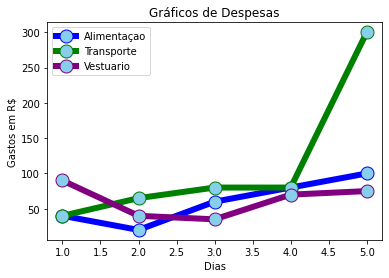

In [ ]:
# Dados gastos
alimentacao = Dicionario({1: 40, 2: 20, 3: 60, 4: 80, 5: 100}, 'blue', 'Alimentaçao')
transporte = Dicionario({1: 40, 2: 65, 3: 80, 4: 80, 5: 300}, 'green', 'Transporte')
vestuario = Dicionario({1: 90, 2: 40, 3: 35, 4: 70, 5: 75}, 'purple', 'Vestuario')
despesas_lista = [alimentacao, transporte, vestuario]
grafico = Grafico(despesas_lista)

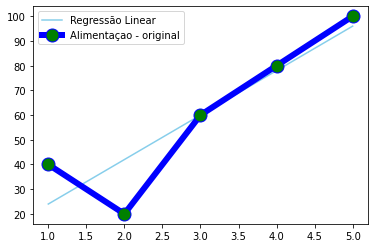

In [ ]:
# Regressão Linear
id_despesa = 0
grafico.regressao_linear(id_despesa)